In [2]:
import pandas as pd
ses = pd.read_csv("05.Session.csv", thousands = ',')
#print(ses.head())
#결측값이 있는 열 제거
drop = ses.dropna(axis=1)
print(drop.head())
new_ses1 = ses['TOT_PAG_VIEW_CT'].fillna(1)
new_ses2 = ses['TOT_SESS_HR_V'].fillna(1)

   CLNT_ID   SESS_ID  SESS_SEQ   SESS_DT DVC_CTG_NM       ZON_NM  CITY_NM
0  5873599   8641867         9  20180509     mobile      Daejeon  Daejeon
1  5873599   6616320        21  20180611     mobile        Busan    Busan
2  5873599   5886172        40  20180624     mobile      Daejeon  Daejeon
3  5873884   1050889        15  20180913     mobile  Gyeonggi-do   Anyang
4  5874461  10298270         5  20180412     mobile        Seoul    Seoul


In [32]:
sess = pd.concat([drop, new_ses1], axis=1)
sess = pd.concat([sess, new_ses2], axis=1)

print(sess.head())

   CLNT_ID   SESS_ID  SESS_SEQ   SESS_DT DVC_CTG_NM       ZON_NM  CITY_NM  \
0  5873599   8641867         9  20180509     mobile      Daejeon  Daejeon   
1  5873599   6616320        21  20180611     mobile        Busan    Busan   
2  5873599   5886172        40  20180624     mobile      Daejeon  Daejeon   
3  5873884   1050889        15  20180913     mobile  Gyeonggi-do   Anyang   
4  5874461  10298270         5  20180412     mobile        Seoul    Seoul   

   TOT_PAG_VIEW_CT  TOT_SESS_HR_V  
0             82.0         1890.0  
1            105.0         1604.0  
2             41.0          632.0  
3            160.0         1035.0  
4             13.0          298.0  


In [33]:
print(sess['TOT_PAG_VIEW_CT'].isnull().values.sum())
print(sess['TOT_SESS_HR_V'].isnull().values.sum())
sess = sess.drop(columns='CLNT_ID')
sess = sess.drop(columns='SESS_DT')
sess = sess.drop(columns='DVC_CTG_NM')
sess = sess.drop(columns='ZON_NM')
sess = sess.drop(columns='CITY_NM')
sess = sess.drop(columns='SESS_ID')
sess = sess.drop(columns='SESS_SEQ')

0
0


In [34]:
print(sess.describe())

       TOT_PAG_VIEW_CT  TOT_SESS_HR_V
count     2.712907e+06   2.712907e+06
mean      8.515918e+01   1.443990e+03
std       8.750844e+01   1.505433e+03
min       1.000000e+00   1.000000e+00
25%       2.900000e+01   4.080000e+02
50%       5.500000e+01   9.440000e+02
75%       1.080000e+02   1.970000e+03
max       4.990000e+02   3.932900e+04


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans

## K-means 해보기

In [62]:
k=5
kmeans = KMeans(n_clusters= k)
y_pred = kmeans.fit_predict(sess)

In [65]:
print(y_pred)
y_pred is kmeans.labels_  # just for check

[4 4 0 ... 2 4 0]


True

In [66]:
kmeans.cluster_centers_

array([[  40.20239411,  445.54448564],
       [ 227.79439634, 4779.51212365],
       [ 150.26869782, 2820.49032253],
       [ 293.56890963, 8279.45897837],
       [  91.56651206, 1478.84736503]])

[0 1 2 3 4]


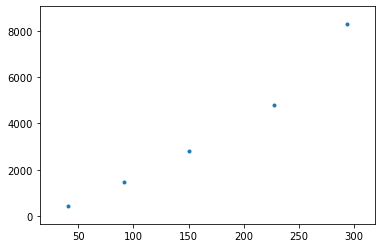

In [81]:
from scipy.spatial import Voronoi, voronoi_plot_2d

# kmeans 해서 나온 center 에다가 보로노이 적용해보기 
sess_new = np.array(kmeans.cluster_centers_)
print(kmeans.predict(sess_new))

vor = Voronoi(sess_new)
voronoi_plot_2d(vor)
plt.show()

## 미니배치 k-평균

In [82]:

from sklearn.cluster import MiniBatchKMeans
clus = MiniBatchKMeans(n_clusters=5, batch_size=50, tol=0.004, max_iter=300)
clus.fit(sess)

MiniBatchKMeans(batch_size=50, max_iter=300, n_clusters=5, tol=0.004)

### 최적의 클러스터 찾기 -elbow 함수이용

In [ ]:
ks = range(1,100)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(sess)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

최적의 클러스터 찾기

In [49]:


#n_clusters = [2,3,4,5,6,7,8,9]

#for k in n_clusters:
#    kmeans = KMeans(n_clusters=k, random_state=42).fit(sess)
#    cluster_labels = kmeans.predict(sess)
#    S = metrics.silhouette_score(sess, cluster_labels)
#    print("n_Clusters = {:d}, silhouette score {:1f}".format(k,S))

model = KMeans(n_clusters=3, algorithm='auto')
model.fit(sess)
predict = pd.DataFrame(model.predict(sess))
predict.columns=['predict']

out = pd.concat([sess,predict],axis=1)

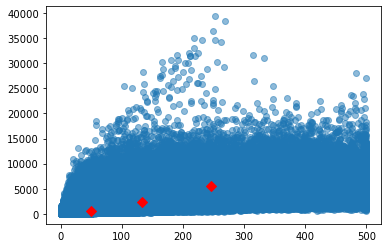

In [50]:

plt.scatter(out['TOT_PAG_VIEW_CT'],out['TOT_SESS_HR_V'], alpha=0.5)
centers = pd.DataFrame(model.cluster_centers_, columns=['TOT_PAG_VIEW_CT','TOT_SESS_HR_V'])
center_x = centers['TOT_PAG_VIEW_CT']
center_y = centers['TOT_SESS_HR_V']
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

In [ ]:
#inertia value
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(sess)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [54]:

from sklearn.cluster import MiniBatchKMeans
clus = MiniBatchKMeans(n_clusters=5, batch_size=50, tol=0.004, max_iter=300)
clus.fit(sess)
#sns.lmplot(x="TOT_PAG_VIEW_CT", y= "TOT_SESS_HR_V",hue=clus.labels_, data=sess, fit_reg=False)

MiniBatchKMeans(batch_size=50, max_iter=300, n_clusters=5, tol=0.004)

In [59]:
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

TypeError: 'list' object cannot be interpreted as an integer